In [6]:
import pandas as pd
from sklearn.datasets import make_circles
from sklearn import svm, metrics
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def make_meshgrid(x,y, h = .02):
    x_min, x_max = x.min()-1, x.max()-1
    y_min, y_max = y.min()-1, y.max()-1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max))
    return xx, yy

def plot_contours(ax,clf,xx,yy,**params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = ax.contourf(xx,yy,**params)
    return out

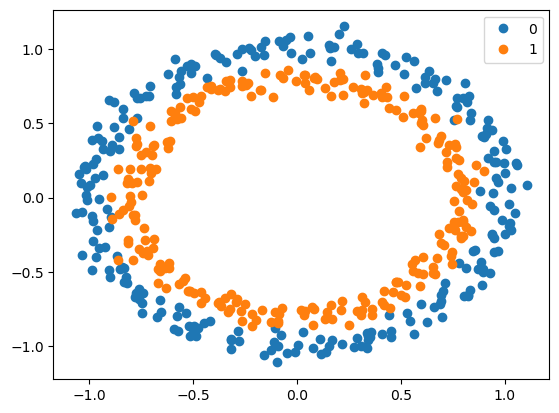

In [8]:
samples = 500
train_prop = 0.8

x,y = make_circles(n_samples = samples, noise = 0.05, random_state = 123)

df = pd.DataFrame(dict(x=x[:,0], y = x[:,1],label = y))

groups = df.groupby('label')

fig,ax = plt.subplots()
ax.margins(0.05)
for name,group in groups:
    ax.plot(group.x,group.y,marker ='o', linestyle ='',ms = 6,label = name)
ax.legend()
plt.show()

In [12]:
# min max ratio

x = (x-x.min())/(x.max()-x.min())
x

array([[0.83658683, 0.29529195],
       [0.25651462, 0.78598009],
       [0.3405057 , 0.8364276 ],
       [0.32948127, 0.16732155],
       [0.50561053, 0.85558653],
       [0.09426295, 0.43325829],
       [0.93353641, 0.56424765],
       [0.44990372, 0.12263588],
       [0.44486298, 0.15117887],
       [0.05579116, 0.42041472],
       [0.75630757, 0.72260362],
       [0.83077635, 0.60989659],
       [0.80741948, 0.83969432],
       [0.76011751, 0.70575235],
       [0.86189039, 0.39098781],
       [0.91114976, 0.59664412],
       [0.1369814 , 0.47909248],
       [0.71175646, 0.1994635 ],
       [0.37277747, 0.12306404],
       [0.93377817, 0.38181054],
       [0.14450336, 0.80188222],
       [0.50856801, 0.85414273],
       [0.50405956, 0.08939498],
       [0.75491665, 0.7116016 ],
       [0.06884912, 0.34218549],
       [0.32696484, 0.81517589],
       [0.51580941, 0.81011788],
       [0.51819301, 0.92184556],
       [0.76715389, 0.12114149],
       [0.27017632, 0.08717988],
       [0.

In [14]:
# model

C = 1.0
model = svm.SVC(kernel = 'linear', C=C)
model.fit(x,y)

SVC(kernel='linear')

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 49)

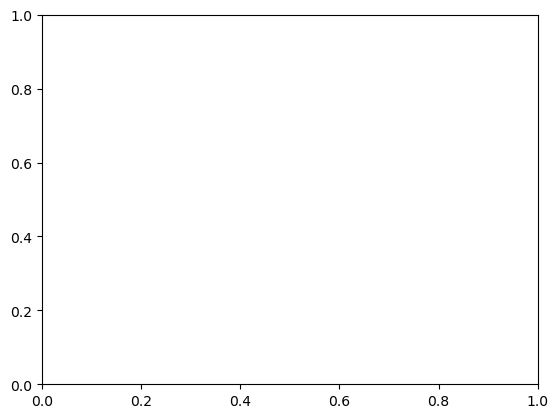

In [18]:
#plots

titles = ('SVC with Linear Kernal')

# setting up 2x2 grid

fig,sub = plt.subplots()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

x0,x1 = x[:,0],x[:,1]

xx,yy = make_meshgrid(x0,x1)

plot_contours(sub, model,xx,yy,cmap = plt.cm.coolwarm, alpha = 0.8)

sub.scatter(x0,x1,c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')
sub.set_xlim(-0.25,1,25)
sub.set_ylim(-0.25,1,25)
sub.set_xlabel('X')
sub.set_tlabel('Y')
sub.set_title(titles)